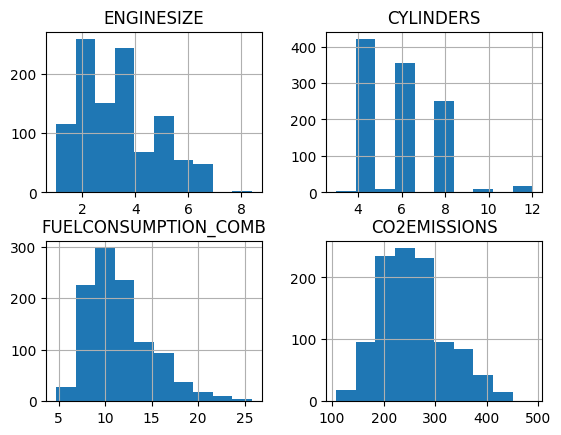

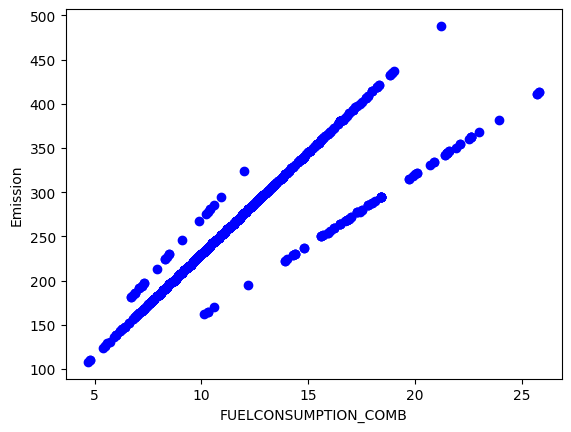

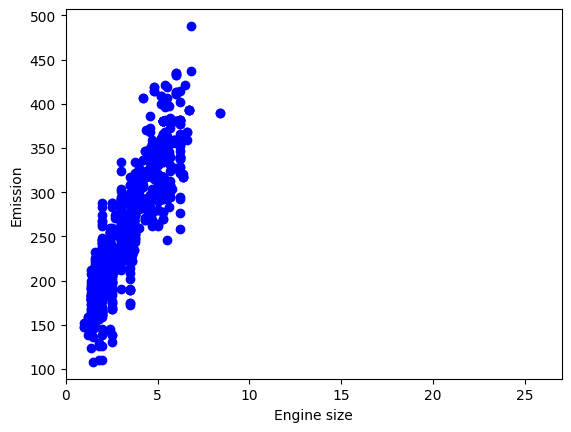

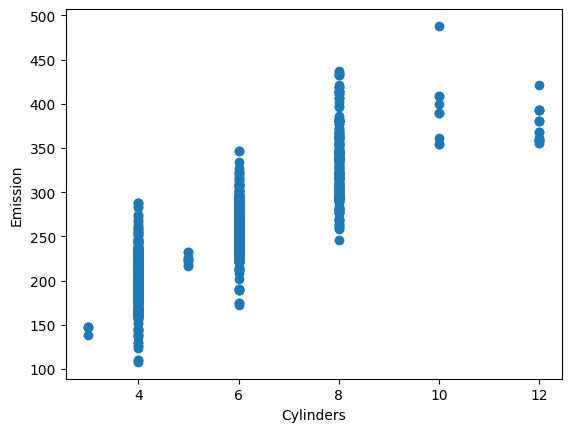

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("FuelConsumptionCo2.csv")

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()

plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('Emission')
plt.show()

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.xlim(0,27)
plt.show()

plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS)
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (853,), (853,))

In [26]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reshape(-1, 1), y_train)

# The coefficients
print('Coefficients: ', regressor.coef_[0])
print ('Intercept: ',regressor.intercept_)

Coefficients:  38.992978724434046
Intercept:  126.2897021740873


Text(0, 0.5, 'Emission')

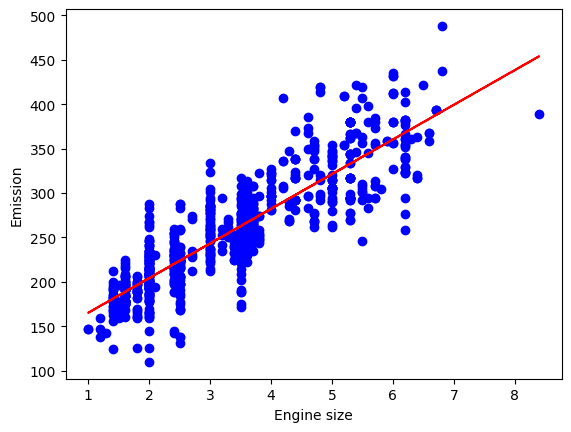

In [19]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76
